# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [210]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
display(len(cities))

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [211]:
column_names = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]
no_cities = 500
cities_df = pd.DataFrame(columns = column_names, index = np.arange(0,no_cities))
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
# Create a Dataframe based on the citinames
element_df = {
    "City": "",
    "Cloudiness": 0,
    "Country" : "",
    "Date" : 0,
    "Humidity" : 0,
    "Lat" : 0,
    "Lng" : 0,
    "Max Temp" : 0,
    "Wind Speed" : 0
}


# Define the parameters for the request
params = {
    "appid" :  weather_api_key,
    "q" : "",
    "units": "metric"
}

city_index = 0
df_index = 0

# Split the group requests into 5 groups of 100 cities
for page in range(0,7):    
    for result in range(0,100):
        # Just to get 500 cities
        if(df_index == 500):
            break;
        print(f" Page No {page+1}")
        params["q"] = cities[city_index] # random city name
        base_url = "http://api.openweathermap.org/data/2.5/weather"
        try:
            display(f"Reading city {cities[city_index]} - Page {page } - Request No {city_index + 1} - City No {df_index + 1} ... ")
            display("Retrieving data...")
            response = requests.get(base_url,params=params).json()
            display("Populating data...")
            cities_df["City"][df_index] = response["name"]
            cities_df["Cloudiness"][df_index] = response["clouds"]["all"]
            cities_df["Country"][df_index] = response["sys"]["country"]
            cities_df["Date"][df_index] = response["dt"]
            cities_df["Humidity"][df_index] = round(float(response["main"]["humidity"]),2)
            cities_df["Lat"][df_index] = round(float(response["coord"]["lat"]),2)
            cities_df["Lng"][df_index] = round(float(response["coord"]["lon"]),2)
            cities_df["Max Temp"][df_index] = round(float(response["main"]["temp_max"]),2)
            cities_df["Wind Speed"][df_index] = round(float(response["wind"]["speed"]),2)
            display("Finishing...")
            df_index += 1
        except KeyError:
            print(f"Oh, oh.City not found. Let's try another city")
        city_index += 1


 Page No 1


'Reading city mathbaria - Page 0 - Request No 1 - Index No 1 ... '

'Retrieving data...'

'Populating data...'

<ipython-input-214-fd2c2c1b7f50>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_df["City"][df_index] = response["name"]
<ipython-input-214-fd2c2c1b7f50>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_df["Cloudiness"][df_index] = response["clouds"]["all"]
<ipython-input-214-fd2c2c1b7f50>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_df["Country"][df_index] = response["sys"]["country"]
<ipython-input-214-fd

'Finishing...'

'Reading city punta arenas - Page 0 - Request No 2 - Index No 2 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city praia - Page 0 - Request No 3 - Index No 3 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city sorvag - Page 0 - Request No 4 - Index No 4 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city lebu - Page 0 - Request No 5 - Index No 4 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ketchikan - Page 0 - Request No 6 - Index No 5 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city carnarvon - Page 0 - Request No 7 - Index No 6 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city shahreza - Page 0 - Request No 8 - Index No 7 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city hobart - Page 0 - Request No 9 - Index No 8 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ushuaia - Page 0 - Request No 10 - Index No 9 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city coquimbo - Page 0 - Request No 11 - Index No 10 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mancio lima - Page 0 - Request No 12 - Index No 11 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city owando - Page 0 - Request No 13 - Index No 12 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city attawapiskat - Page 0 - Request No 14 - Index No 13 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city jamestown - Page 0 - Request No 15 - Index No 13 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tadine - Page 0 - Request No 16 - Index No 14 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city esperance - Page 0 - Request No 17 - Index No 15 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city qaanaaq - Page 0 - Request No 18 - Index No 16 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kodiak - Page 0 - Request No 19 - Index No 17 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city pevek - Page 0 - Request No 20 - Index No 18 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city saint-philippe - Page 0 - Request No 21 - Index No 19 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city cabo san lucas - Page 0 - Request No 22 - Index No 20 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city chokurdakh - Page 0 - Request No 23 - Index No 21 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city zhigansk - Page 0 - Request No 24 - Index No 22 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city nikolskoye - Page 0 - Request No 25 - Index No 23 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city vaini - Page 0 - Request No 26 - Index No 24 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city te anau - Page 0 - Request No 27 - Index No 25 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city constitucion - Page 0 - Request No 28 - Index No 26 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city cape town - Page 0 - Request No 29 - Index No 27 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city hilo - Page 0 - Request No 30 - Index No 28 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mar del plata - Page 0 - Request No 31 - Index No 29 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city avarua - Page 0 - Request No 32 - Index No 30 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city illoqqortoormiut - Page 0 - Request No 33 - Index No 31 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city mataura - Page 0 - Request No 34 - Index No 31 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city port alfred - Page 0 - Request No 35 - Index No 32 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city new norfolk - Page 0 - Request No 36 - Index No 33 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city eenhana - Page 0 - Request No 37 - Index No 34 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city albany - Page 0 - Request No 38 - Index No 35 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city pachino - Page 0 - Request No 39 - Index No 36 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city grand gaube - Page 0 - Request No 40 - Index No 37 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city severo-kurilsk - Page 0 - Request No 41 - Index No 38 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city nizhneyansk - Page 0 - Request No 42 - Index No 39 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city komsomolskiy - Page 0 - Request No 43 - Index No 39 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tuktoyaktuk - Page 0 - Request No 44 - Index No 40 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city atuona - Page 0 - Request No 45 - Index No 41 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city sampit - Page 0 - Request No 46 - Index No 42 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ribeira grande - Page 0 - Request No 47 - Index No 43 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city zhuzhou - Page 0 - Request No 48 - Index No 44 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city castro - Page 0 - Request No 49 - Index No 45 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city komatipoort - Page 0 - Request No 50 - Index No 46 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ilulissat - Page 0 - Request No 51 - Index No 47 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city hithadhoo - Page 0 - Request No 52 - Index No 48 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tidore - Page 0 - Request No 53 - Index No 49 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city xichang - Page 0 - Request No 54 - Index No 49 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city vila velha - Page 0 - Request No 55 - Index No 50 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city bredasdorp - Page 0 - Request No 56 - Index No 51 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city rodney - Page 0 - Request No 57 - Index No 52 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city bubaque - Page 0 - Request No 58 - Index No 53 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city warqla - Page 0 - Request No 59 - Index No 54 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city busselton - Page 0 - Request No 60 - Index No 54 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city cidreira - Page 0 - Request No 61 - Index No 55 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city rikitea - Page 0 - Request No 62 - Index No 56 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city butaritari - Page 0 - Request No 63 - Index No 57 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city gaimersheim - Page 0 - Request No 64 - Index No 58 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city aasiaat - Page 0 - Request No 65 - Index No 59 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city yeletskiy - Page 0 - Request No 66 - Index No 60 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city cecina - Page 0 - Request No 67 - Index No 60 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city half moon bay - Page 0 - Request No 68 - Index No 61 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city berlevag - Page 0 - Request No 69 - Index No 62 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city rusape - Page 0 - Request No 70 - Index No 63 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city elk grove - Page 0 - Request No 71 - Index No 64 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city leon - Page 0 - Request No 72 - Index No 65 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kengyel - Page 0 - Request No 73 - Index No 66 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city antofagasta - Page 0 - Request No 74 - Index No 67 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city lata - Page 0 - Request No 75 - Index No 68 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city aizawl - Page 0 - Request No 76 - Index No 69 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city hambantota - Page 0 - Request No 77 - Index No 70 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city bonavista - Page 0 - Request No 78 - Index No 71 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city port macquarie - Page 0 - Request No 79 - Index No 72 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city yellowknife - Page 0 - Request No 80 - Index No 73 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tuatapere - Page 0 - Request No 81 - Index No 74 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city khatanga - Page 0 - Request No 82 - Index No 75 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ust-maya - Page 0 - Request No 83 - Index No 76 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city lichuan - Page 0 - Request No 84 - Index No 77 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city sisimiut - Page 0 - Request No 85 - Index No 78 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city manta - Page 0 - Request No 86 - Index No 79 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city taolanaro - Page 0 - Request No 87 - Index No 80 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city bur gabo - Page 0 - Request No 88 - Index No 80 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city uige - Page 0 - Request No 89 - Index No 80 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city opuwo - Page 0 - Request No 90 - Index No 81 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city barentsburg - Page 0 - Request No 91 - Index No 82 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city naftah - Page 0 - Request No 92 - Index No 82 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city san ignacio - Page 0 - Request No 93 - Index No 82 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kapaa - Page 0 - Request No 94 - Index No 83 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city upernavik - Page 0 - Request No 95 - Index No 84 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city oga - Page 0 - Request No 96 - Index No 85 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ukiah - Page 0 - Request No 97 - Index No 86 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city calais - Page 0 - Request No 98 - Index No 87 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kahului - Page 0 - Request No 99 - Index No 88 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city hofn - Page 0 - Request No 100 - Index No 89 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

 Page No 2


'Reading city bluff - Page 1 - Request No 101 - Index No 90 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mabaruma - Page 1 - Request No 102 - Index No 91 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city morant bay - Page 1 - Request No 103 - Index No 92 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city hualmay - Page 1 - Request No 104 - Index No 93 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city deputatskiy - Page 1 - Request No 105 - Index No 94 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ballina - Page 1 - Request No 106 - Index No 95 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city norman wells - Page 1 - Request No 107 - Index No 96 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city broome - Page 1 - Request No 108 - Index No 97 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city bandarbeyla - Page 1 - Request No 109 - Index No 98 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kabalo - Page 1 - Request No 110 - Index No 99 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tsihombe - Page 1 - Request No 111 - Index No 100 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city bethel - Page 1 - Request No 112 - Index No 100 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city fare - Page 1 - Request No 113 - Index No 101 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city port elizabeth - Page 1 - Request No 114 - Index No 102 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city srednekolymsk - Page 1 - Request No 115 - Index No 103 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city marystown - Page 1 - Request No 116 - Index No 104 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city thompson - Page 1 - Request No 117 - Index No 105 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city jiwani - Page 1 - Request No 118 - Index No 106 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city saskylakh - Page 1 - Request No 119 - Index No 107 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city santa ines - Page 1 - Request No 120 - Index No 108 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city casambalangan - Page 1 - Request No 121 - Index No 109 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city maldonado - Page 1 - Request No 122 - Index No 110 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city camacha - Page 1 - Request No 123 - Index No 111 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city hermanus - Page 1 - Request No 124 - Index No 112 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city sinnamary - Page 1 - Request No 125 - Index No 113 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kaitangata - Page 1 - Request No 126 - Index No 114 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city luderitz - Page 1 - Request No 127 - Index No 115 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city dutlwe - Page 1 - Request No 128 - Index No 116 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city georgetown - Page 1 - Request No 129 - Index No 117 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city san juan bautista - Page 1 - Request No 130 - Index No 118 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city sahbuz - Page 1 - Request No 131 - Index No 119 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city pangnirtung - Page 1 - Request No 132 - Index No 120 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city touros - Page 1 - Request No 133 - Index No 121 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city rungata - Page 1 - Request No 134 - Index No 122 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city hopkinsville - Page 1 - Request No 135 - Index No 122 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city puerto ayora - Page 1 - Request No 136 - Index No 123 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tarapur - Page 1 - Request No 137 - Index No 124 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city khani - Page 1 - Request No 138 - Index No 125 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city saleaula - Page 1 - Request No 139 - Index No 126 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city allapalli - Page 1 - Request No 140 - Index No 126 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tasiilaq - Page 1 - Request No 141 - Index No 127 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city maymanak - Page 1 - Request No 142 - Index No 128 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city fort saint james - Page 1 - Request No 143 - Index No 128 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city east london - Page 1 - Request No 144 - Index No 129 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city grande prairie - Page 1 - Request No 145 - Index No 130 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ostrovnoy - Page 1 - Request No 146 - Index No 131 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mareeba - Page 1 - Request No 147 - Index No 132 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city chuy - Page 1 - Request No 148 - Index No 133 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mount pleasant - Page 1 - Request No 149 - Index No 134 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city vaitupu - Page 1 - Request No 150 - Index No 135 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city avera - Page 1 - Request No 151 - Index No 135 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tahta - Page 1 - Request No 152 - Index No 136 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city egvekinot - Page 1 - Request No 153 - Index No 137 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city sao filipe - Page 1 - Request No 154 - Index No 138 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city lyngseidet - Page 1 - Request No 155 - Index No 139 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city naze - Page 1 - Request No 156 - Index No 140 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city faanui - Page 1 - Request No 157 - Index No 141 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city shatalovo - Page 1 - Request No 158 - Index No 142 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city samusu - Page 1 - Request No 159 - Index No 143 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city yavoriv - Page 1 - Request No 160 - Index No 143 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mnogovershinnyy - Page 1 - Request No 161 - Index No 144 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city hirara - Page 1 - Request No 162 - Index No 145 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city port moresby - Page 1 - Request No 163 - Index No 146 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city honiara - Page 1 - Request No 164 - Index No 147 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kidal - Page 1 - Request No 165 - Index No 148 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city havoysund - Page 1 - Request No 166 - Index No 149 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city westport - Page 1 - Request No 167 - Index No 150 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city muravlenko - Page 1 - Request No 168 - Index No 151 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city necochea - Page 1 - Request No 169 - Index No 152 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city otradnoye - Page 1 - Request No 170 - Index No 153 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city leh - Page 1 - Request No 171 - Index No 154 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city hamilton - Page 1 - Request No 172 - Index No 155 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city oranjestad - Page 1 - Request No 173 - Index No 156 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city sao jose da coroa grande - Page 1 - Request No 174 - Index No 157 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ouallam - Page 1 - Request No 175 - Index No 158 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city yamada - Page 1 - Request No 176 - Index No 159 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city murmashi - Page 1 - Request No 177 - Index No 160 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city agadez - Page 1 - Request No 178 - Index No 161 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mount isa - Page 1 - Request No 179 - Index No 162 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city price - Page 1 - Request No 180 - Index No 163 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city boa vista - Page 1 - Request No 181 - Index No 164 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city salinas - Page 1 - Request No 182 - Index No 165 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kruisfontein - Page 1 - Request No 183 - Index No 166 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city santiago - Page 1 - Request No 184 - Index No 167 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city palmares do sul - Page 1 - Request No 185 - Index No 168 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city bathsheba - Page 1 - Request No 186 - Index No 169 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city rafaela - Page 1 - Request No 187 - Index No 170 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city petropavlovsk-kamchatskiy - Page 1 - Request No 188 - Index No 171 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tatsuno - Page 1 - Request No 189 - Index No 172 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city arman - Page 1 - Request No 190 - Index No 173 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mahebourg - Page 1 - Request No 191 - Index No 174 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city havre-saint-pierre - Page 1 - Request No 192 - Index No 175 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ixtapa - Page 1 - Request No 193 - Index No 176 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city souillac - Page 1 - Request No 194 - Index No 177 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city galveston - Page 1 - Request No 195 - Index No 178 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city vila franca do campo - Page 1 - Request No 196 - Index No 179 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city san patricio - Page 1 - Request No 197 - Index No 180 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city hobyo - Page 1 - Request No 198 - Index No 181 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city leningradskiy - Page 1 - Request No 199 - Index No 182 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city chaozhou - Page 1 - Request No 200 - Index No 183 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

 Page No 3


'Reading city lithakia - Page 2 - Request No 201 - Index No 184 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city takoradi - Page 2 - Request No 202 - Index No 185 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city namibe - Page 2 - Request No 203 - Index No 186 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city grand-santi - Page 2 - Request No 204 - Index No 187 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city saint-lo - Page 2 - Request No 205 - Index No 188 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city caravelas - Page 2 - Request No 206 - Index No 189 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city jiaojiang - Page 2 - Request No 207 - Index No 190 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city psebay - Page 2 - Request No 208 - Index No 191 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city port-cartier - Page 2 - Request No 209 - Index No 192 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city oriximina - Page 2 - Request No 210 - Index No 193 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mys shmidta - Page 2 - Request No 211 - Index No 194 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city sentyabrskiy - Page 2 - Request No 212 - Index No 194 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city gladstone - Page 2 - Request No 213 - Index No 194 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city airai - Page 2 - Request No 214 - Index No 195 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ganzhou - Page 2 - Request No 215 - Index No 196 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city longyearbyen - Page 2 - Request No 216 - Index No 197 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city sarab - Page 2 - Request No 217 - Index No 198 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city eyl - Page 2 - Request No 218 - Index No 199 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city narsaq - Page 2 - Request No 219 - Index No 200 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city saint anthony - Page 2 - Request No 220 - Index No 201 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city sur - Page 2 - Request No 221 - Index No 202 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city hami - Page 2 - Request No 222 - Index No 203 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city klaksvik - Page 2 - Request No 223 - Index No 204 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city pali - Page 2 - Request No 224 - Index No 205 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kushmurun - Page 2 - Request No 225 - Index No 206 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city hasaki - Page 2 - Request No 226 - Index No 207 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ontario - Page 2 - Request No 227 - Index No 208 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kamenskoye - Page 2 - Request No 228 - Index No 209 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city bronnoysund - Page 2 - Request No 229 - Index No 209 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city buariki - Page 2 - Request No 230 - Index No 210 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city bonthe - Page 2 - Request No 231 - Index No 210 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city jalu - Page 2 - Request No 232 - Index No 211 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city barrow - Page 2 - Request No 233 - Index No 212 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city manaure - Page 2 - Request No 234 - Index No 213 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city dalvik - Page 2 - Request No 235 - Index No 214 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city nanortalik - Page 2 - Request No 236 - Index No 215 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city iracoubo - Page 2 - Request No 237 - Index No 216 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city amderma - Page 2 - Request No 238 - Index No 217 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city richards bay - Page 2 - Request No 239 - Index No 217 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city wahiawa - Page 2 - Request No 240 - Index No 218 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city buraydah - Page 2 - Request No 241 - Index No 219 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kanniyakumari - Page 2 - Request No 242 - Index No 220 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city inhambane - Page 2 - Request No 243 - Index No 221 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city eresos - Page 2 - Request No 244 - Index No 222 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city fukue - Page 2 - Request No 245 - Index No 223 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kieta - Page 2 - Request No 246 - Index No 224 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city menongue - Page 2 - Request No 247 - Index No 225 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city nicoya - Page 2 - Request No 248 - Index No 226 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city pacific grove - Page 2 - Request No 249 - Index No 227 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city lorengau - Page 2 - Request No 250 - Index No 228 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tiksi - Page 2 - Request No 251 - Index No 229 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city torbay - Page 2 - Request No 252 - Index No 230 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city zyryanka - Page 2 - Request No 253 - Index No 231 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city belvedere marittimo - Page 2 - Request No 254 - Index No 232 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city salalah - Page 2 - Request No 255 - Index No 233 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city buzmeyin - Page 2 - Request No 256 - Index No 234 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mahanje - Page 2 - Request No 257 - Index No 235 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city nome - Page 2 - Request No 258 - Index No 236 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city coruripe - Page 2 - Request No 259 - Index No 237 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city viedma - Page 2 - Request No 260 - Index No 238 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city yar-sale - Page 2 - Request No 261 - Index No 239 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city karratha - Page 2 - Request No 262 - Index No 240 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city yomitan - Page 2 - Request No 263 - Index No 241 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city vorukh - Page 2 - Request No 264 - Index No 241 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city husavik - Page 2 - Request No 265 - Index No 242 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city goure - Page 2 - Request No 266 - Index No 243 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city fortuna - Page 2 - Request No 267 - Index No 244 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city vardo - Page 2 - Request No 268 - Index No 245 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city anadyr - Page 2 - Request No 269 - Index No 246 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ozuluama - Page 2 - Request No 270 - Index No 247 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city miyako - Page 2 - Request No 271 - Index No 248 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city provideniya - Page 2 - Request No 272 - Index No 249 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mweka - Page 2 - Request No 273 - Index No 250 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city machico - Page 2 - Request No 274 - Index No 251 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city la ronge - Page 2 - Request No 275 - Index No 252 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city damghan - Page 2 - Request No 276 - Index No 253 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city cartagena del chaira - Page 2 - Request No 277 - Index No 254 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city rocha - Page 2 - Request No 278 - Index No 255 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city porto walter - Page 2 - Request No 279 - Index No 256 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city sirjan - Page 2 - Request No 280 - Index No 257 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city aguimes - Page 2 - Request No 281 - Index No 258 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ardalstangen - Page 2 - Request No 282 - Index No 259 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city yermish - Page 2 - Request No 283 - Index No 260 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city nador - Page 2 - Request No 284 - Index No 261 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city north bend - Page 2 - Request No 285 - Index No 262 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city wyndham - Page 2 - Request No 286 - Index No 263 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city yatou - Page 2 - Request No 287 - Index No 264 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city pontes e lacerda - Page 2 - Request No 288 - Index No 265 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city saldanha - Page 2 - Request No 289 - Index No 266 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city port lincoln - Page 2 - Request No 290 - Index No 267 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city jamame - Page 2 - Request No 291 - Index No 268 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tezu - Page 2 - Request No 292 - Index No 269 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city thohoyandou - Page 2 - Request No 293 - Index No 270 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city palmer - Page 2 - Request No 294 - Index No 271 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city arraial do cabo - Page 2 - Request No 295 - Index No 272 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kaeo - Page 2 - Request No 296 - Index No 273 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city katsuura - Page 2 - Request No 297 - Index No 274 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city itupiranga - Page 2 - Request No 298 - Index No 275 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city nguiu - Page 2 - Request No 299 - Index No 276 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city ilebo - Page 2 - Request No 300 - Index No 276 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

 Page No 4


'Reading city carauari - Page 3 - Request No 301 - Index No 277 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city grand baie - Page 3 - Request No 302 - Index No 278 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city olafsvik - Page 3 - Request No 303 - Index No 279 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city cayenne - Page 3 - Request No 304 - Index No 280 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city yabrud - Page 3 - Request No 305 - Index No 281 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kuytun - Page 3 - Request No 306 - Index No 282 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city amla - Page 3 - Request No 307 - Index No 283 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city adrar - Page 3 - Request No 308 - Index No 284 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city port-gentil - Page 3 - Request No 309 - Index No 285 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tulum - Page 3 - Request No 310 - Index No 286 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city puerto narino - Page 3 - Request No 311 - Index No 287 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city cherskiy - Page 3 - Request No 312 - Index No 288 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tura - Page 3 - Request No 313 - Index No 289 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city west plains - Page 3 - Request No 314 - Index No 290 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city qixingtai - Page 3 - Request No 315 - Index No 291 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city yining - Page 3 - Request No 316 - Index No 292 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city lamont - Page 3 - Request No 317 - Index No 293 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city skalistyy - Page 3 - Request No 318 - Index No 294 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city ahumada - Page 3 - Request No 319 - Index No 294 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city etampes - Page 3 - Request No 320 - Index No 294 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city vizinga - Page 3 - Request No 321 - Index No 295 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kaili - Page 3 - Request No 322 - Index No 296 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city clyde river - Page 3 - Request No 323 - Index No 297 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city fairbanks - Page 3 - Request No 324 - Index No 298 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city turayf - Page 3 - Request No 325 - Index No 299 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city teshie - Page 3 - Request No 326 - Index No 300 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city pahrump - Page 3 - Request No 327 - Index No 301 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mantua - Page 3 - Request No 328 - Index No 302 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city semey - Page 3 - Request No 329 - Index No 303 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city flinders - Page 3 - Request No 330 - Index No 304 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city bada - Page 3 - Request No 331 - Index No 305 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kegayli - Page 3 - Request No 332 - Index No 306 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city buala - Page 3 - Request No 333 - Index No 306 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city bucerias - Page 3 - Request No 334 - Index No 307 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city palabuhanratu - Page 3 - Request No 335 - Index No 308 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city davila - Page 3 - Request No 336 - Index No 308 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city yumen - Page 3 - Request No 337 - Index No 309 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city marawi - Page 3 - Request No 338 - Index No 310 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ancud - Page 3 - Request No 339 - Index No 311 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city jiuquan - Page 3 - Request No 340 - Index No 312 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city victoria - Page 3 - Request No 341 - Index No 313 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city le port - Page 3 - Request No 342 - Index No 314 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city belushya guba - Page 3 - Request No 343 - Index No 315 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city florianopolis - Page 3 - Request No 344 - Index No 315 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city maragogi - Page 3 - Request No 345 - Index No 316 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city bambous virieux - Page 3 - Request No 346 - Index No 317 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city nemuro - Page 3 - Request No 347 - Index No 318 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tomatlan - Page 3 - Request No 348 - Index No 319 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city fort walton beach - Page 3 - Request No 349 - Index No 320 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city berdigestyakh - Page 3 - Request No 350 - Index No 321 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tallahassee - Page 3 - Request No 351 - Index No 322 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city rieti - Page 3 - Request No 352 - Index No 323 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city miraflores - Page 3 - Request No 353 - Index No 324 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city quatre cocos - Page 3 - Request No 354 - Index No 325 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city dikson - Page 3 - Request No 355 - Index No 326 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city virginia beach - Page 3 - Request No 356 - Index No 327 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city roma - Page 3 - Request No 357 - Index No 328 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city qeshm - Page 3 - Request No 358 - Index No 329 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city natal - Page 3 - Request No 359 - Index No 330 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ponta delgada - Page 3 - Request No 360 - Index No 331 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city port blair - Page 3 - Request No 361 - Index No 332 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city garowe - Page 3 - Request No 362 - Index No 333 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city nuevo progreso - Page 3 - Request No 363 - Index No 334 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city shakawe - Page 3 - Request No 364 - Index No 335 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city slave lake - Page 3 - Request No 365 - Index No 336 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city whyalla - Page 3 - Request No 366 - Index No 337 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city cockburn harbour - Page 3 - Request No 367 - Index No 338 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city rudnaya pristan - Page 3 - Request No 368 - Index No 338 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city namatanai - Page 3 - Request No 369 - Index No 339 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kavaratti - Page 3 - Request No 370 - Index No 340 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city vestmanna - Page 3 - Request No 371 - Index No 341 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city udachnyy - Page 3 - Request No 372 - Index No 342 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city balabac - Page 3 - Request No 373 - Index No 343 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city san jose - Page 3 - Request No 374 - Index No 344 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city belaya gora - Page 3 - Request No 375 - Index No 345 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city porto novo - Page 3 - Request No 376 - Index No 346 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kavieng - Page 3 - Request No 377 - Index No 347 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city pangai - Page 3 - Request No 378 - Index No 348 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mujiayingzi - Page 3 - Request No 379 - Index No 349 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kaspiysk - Page 3 - Request No 380 - Index No 350 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ploemeur - Page 3 - Request No 381 - Index No 351 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city trinidad - Page 3 - Request No 382 - Index No 352 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city wanning - Page 3 - Request No 383 - Index No 353 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city stornoway - Page 3 - Request No 384 - Index No 354 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city alotau - Page 3 - Request No 385 - Index No 355 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city talas - Page 3 - Request No 386 - Index No 355 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city saint george - Page 3 - Request No 387 - Index No 356 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city demyansk - Page 3 - Request No 388 - Index No 357 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city hanmer springs - Page 3 - Request No 389 - Index No 358 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city denpasar - Page 3 - Request No 390 - Index No 359 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city jutai - Page 3 - Request No 391 - Index No 360 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kincardine - Page 3 - Request No 392 - Index No 361 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city vostok - Page 3 - Request No 393 - Index No 362 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city baijiantan - Page 3 - Request No 394 - Index No 363 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city aklavik - Page 3 - Request No 395 - Index No 364 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city lavrentiya - Page 3 - Request No 396 - Index No 365 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city paracuru - Page 3 - Request No 397 - Index No 366 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city shibarghan - Page 3 - Request No 398 - Index No 367 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city killybegs - Page 3 - Request No 399 - Index No 367 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city sibu - Page 3 - Request No 400 - Index No 368 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

 Page No 5


'Reading city alofi - Page 4 - Request No 401 - Index No 369 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ulladulla - Page 4 - Request No 402 - Index No 370 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kachikau - Page 4 - Request No 403 - Index No 371 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city soyo - Page 4 - Request No 404 - Index No 371 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city korla - Page 4 - Request No 405 - Index No 372 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kargasok - Page 4 - Request No 406 - Index No 373 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city bay roberts - Page 4 - Request No 407 - Index No 374 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city marzuq - Page 4 - Request No 408 - Index No 375 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kysyl-syr - Page 4 - Request No 409 - Index No 376 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ponta do sol - Page 4 - Request No 410 - Index No 377 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mayo - Page 4 - Request No 411 - Index No 378 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city isangel - Page 4 - Request No 412 - Index No 379 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city itaituba - Page 4 - Request No 413 - Index No 380 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city lasa - Page 4 - Request No 414 - Index No 381 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city talcahuano - Page 4 - Request No 415 - Index No 382 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city saint-francois - Page 4 - Request No 416 - Index No 383 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city iqaluit - Page 4 - Request No 417 - Index No 384 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city floro - Page 4 - Request No 418 - Index No 385 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city payo - Page 4 - Request No 419 - Index No 386 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city lixourion - Page 4 - Request No 420 - Index No 387 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city bundaberg - Page 4 - Request No 421 - Index No 388 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city wasilla - Page 4 - Request No 422 - Index No 389 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city cockburn town - Page 4 - Request No 423 - Index No 390 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city bosaso - Page 4 - Request No 424 - Index No 391 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city gisenyi - Page 4 - Request No 425 - Index No 392 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city lusambo - Page 4 - Request No 426 - Index No 393 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city birao - Page 4 - Request No 427 - Index No 394 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city heihe - Page 4 - Request No 428 - Index No 395 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city gayeri - Page 4 - Request No 429 - Index No 396 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city surt - Page 4 - Request No 430 - Index No 397 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city samalaeulu - Page 4 - Request No 431 - Index No 398 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city mutoko - Page 4 - Request No 432 - Index No 398 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kerrville - Page 4 - Request No 433 - Index No 399 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city nago - Page 4 - Request No 434 - Index No 400 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city altagracia de orituco - Page 4 - Request No 435 - Index No 401 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ushtobe - Page 4 - Request No 436 - Index No 402 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city den helder - Page 4 - Request No 437 - Index No 403 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mustasaari - Page 4 - Request No 438 - Index No 404 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city hovd - Page 4 - Request No 439 - Index No 405 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city maple creek - Page 4 - Request No 440 - Index No 406 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city zabid - Page 4 - Request No 441 - Index No 407 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city sitka - Page 4 - Request No 442 - Index No 408 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ajdabiya - Page 4 - Request No 443 - Index No 409 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city huarmey - Page 4 - Request No 444 - Index No 410 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city namtsy - Page 4 - Request No 445 - Index No 411 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city hermiston - Page 4 - Request No 446 - Index No 412 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city wewak - Page 4 - Request No 447 - Index No 413 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city aqtobe - Page 4 - Request No 448 - Index No 414 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ferkessedougou - Page 4 - Request No 449 - Index No 415 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city goderich - Page 4 - Request No 450 - Index No 416 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city borogontsy - Page 4 - Request No 451 - Index No 417 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city olinda - Page 4 - Request No 452 - Index No 418 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city esfarayen - Page 4 - Request No 453 - Index No 419 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kendari - Page 4 - Request No 454 - Index No 420 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kununurra - Page 4 - Request No 455 - Index No 421 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city saint-felicien - Page 4 - Request No 456 - Index No 422 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ciudad bolivar - Page 4 - Request No 457 - Index No 423 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city san quintin - Page 4 - Request No 458 - Index No 424 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kamenka - Page 4 - Request No 459 - Index No 425 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city contai - Page 4 - Request No 460 - Index No 426 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city aktash - Page 4 - Request No 461 - Index No 427 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city neuquen - Page 4 - Request No 462 - Index No 428 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city thinadhoo - Page 4 - Request No 463 - Index No 429 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city najran - Page 4 - Request No 464 - Index No 430 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city omboue - Page 4 - Request No 465 - Index No 431 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city asayita - Page 4 - Request No 466 - Index No 432 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city keti bandar - Page 4 - Request No 467 - Index No 432 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city arlit - Page 4 - Request No 468 - Index No 433 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city morristown - Page 4 - Request No 469 - Index No 434 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city marcona - Page 4 - Request No 470 - Index No 435 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city conceicao do araguaia - Page 4 - Request No 471 - Index No 435 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city dudinka - Page 4 - Request No 472 - Index No 436 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city baruun-urt - Page 4 - Request No 473 - Index No 437 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city sakakah - Page 4 - Request No 474 - Index No 438 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city visby - Page 4 - Request No 475 - Index No 439 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city yeppoon - Page 4 - Request No 476 - Index No 440 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city talnakh - Page 4 - Request No 477 - Index No 441 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ereymentau - Page 4 - Request No 478 - Index No 442 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city nuuk - Page 4 - Request No 479 - Index No 443 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city corinto - Page 4 - Request No 480 - Index No 444 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city dunedin - Page 4 - Request No 481 - Index No 445 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city xingtai - Page 4 - Request No 482 - Index No 446 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city vilyuysk - Page 4 - Request No 483 - Index No 447 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city yingkou - Page 4 - Request No 484 - Index No 448 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city batagay-alyta - Page 4 - Request No 485 - Index No 449 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city elbistan - Page 4 - Request No 486 - Index No 450 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city stamsund - Page 4 - Request No 487 - Index No 451 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city nizwa - Page 4 - Request No 488 - Index No 451 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city malanje - Page 4 - Request No 489 - Index No 452 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city port hardy - Page 4 - Request No 490 - Index No 453 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city manggar - Page 4 - Request No 491 - Index No 454 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city brae - Page 4 - Request No 492 - Index No 455 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mitchell - Page 4 - Request No 493 - Index No 456 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city yichun - Page 4 - Request No 494 - Index No 457 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city biryusinsk - Page 4 - Request No 495 - Index No 458 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ngukurr - Page 4 - Request No 496 - Index No 459 ... '

'Retrieving data...'

'Populating data...'

Oh, oh.City not found. Let's try another city


'Reading city outjo - Page 4 - Request No 497 - Index No 459 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city port hedland - Page 4 - Request No 498 - Index No 460 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city vytegra - Page 4 - Request No 499 - Index No 461 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city kungurtug - Page 4 - Request No 500 - Index No 462 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

 Page No 6


'Reading city quelimane - Page 5 - Request No 501 - Index No 463 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mount gambier - Page 5 - Request No 502 - Index No 464 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city matiri - Page 5 - Request No 503 - Index No 465 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city san cristobal - Page 5 - Request No 504 - Index No 466 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city presidencia roque saenz pena - Page 5 - Request No 505 - Index No 467 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city comodoro rivadavia - Page 5 - Request No 506 - Index No 468 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city punta cardon - Page 5 - Request No 507 - Index No 469 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city yelizovo - Page 5 - Request No 508 - Index No 470 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city gobabis - Page 5 - Request No 509 - Index No 471 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city yerbogachen - Page 5 - Request No 510 - Index No 472 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city zaysan - Page 5 - Request No 511 - Index No 473 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city san lorenzo - Page 5 - Request No 512 - Index No 474 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city oskaloosa - Page 5 - Request No 513 - Index No 475 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city bang saphan - Page 5 - Request No 514 - Index No 476 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city gizo - Page 5 - Request No 515 - Index No 477 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city chitral - Page 5 - Request No 516 - Index No 478 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ondjiva - Page 5 - Request No 517 - Index No 479 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city caceres - Page 5 - Request No 518 - Index No 480 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city aswan - Page 5 - Request No 519 - Index No 481 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city xining - Page 5 - Request No 520 - Index No 482 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city monrovia - Page 5 - Request No 521 - Index No 483 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city evanston - Page 5 - Request No 522 - Index No 484 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city shache - Page 5 - Request No 523 - Index No 485 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city tete - Page 5 - Request No 524 - Index No 486 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city igarka - Page 5 - Request No 525 - Index No 487 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city sorland - Page 5 - Request No 526 - Index No 488 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city imbituba - Page 5 - Request No 527 - Index No 489 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city richmond - Page 5 - Request No 528 - Index No 490 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city usevya - Page 5 - Request No 529 - Index No 491 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city sayyan - Page 5 - Request No 530 - Index No 492 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city portmarnock - Page 5 - Request No 531 - Index No 493 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city portobelo - Page 5 - Request No 532 - Index No 494 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city mollendo - Page 5 - Request No 533 - Index No 495 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city jequie - Page 5 - Request No 534 - Index No 496 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city ahipara - Page 5 - Request No 535 - Index No 497 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city puerto penasco - Page 5 - Request No 536 - Index No 498 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city shingu - Page 5 - Request No 537 - Index No 499 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

'Reading city dhidhdhoo - Page 5 - Request No 538 - Index No 500 ... '

'Retrieving data...'

'Populating data...'

'Finishing...'

 Page No 7


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [215]:
# Export the dataframe
#cities_df.to_csv("../output_data/cities.csv",index=False)
cities_df = pd.read_csv("../output_data/cities.csv")
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mathbaria,0,BD,1585526597,41.0,22.29,89.96,24.41,1.77
1,Punta Arenas,75,CL,1585526598,57.0,-53.15,-70.92,11.00,5.70
2,Praia,40,CV,1585526598,78.0,14.92,-23.51,22.00,7.70
3,Lebu,0,CL,1585526598,68.0,-37.62,-73.65,12.86,7.69
4,Ketchikan,90,US,1585526419,93.0,55.34,-131.65,4.00,10.30


In [247]:
display(cities_df.head())
min_Lat = cities_df["Lat"].min() - 5
max_Lat = cities_df["Lat"].max() +  5

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mathbaria,0,BD,1585526597,41.0,22.29,89.96,24.41,1.77
1,Punta Arenas,75,CL,1585526598,57.0,-53.15,-70.92,11.00,5.70
2,Praia,40,CV,1585526598,78.0,14.92,-23.51,22.00,7.70
3,Lebu,0,CL,1585526598,68.0,-37.62,-73.65,12.86,7.69
4,Ketchikan,90,US,1585526419,93.0,55.34,-131.65,4.00,10.30


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

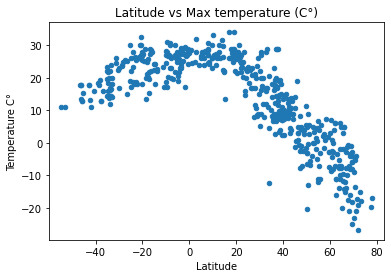

In [233]:
cities_df.plot(x="Lat",y="Max Temp", kind="scatter",title="Latitude vs Max temperature (C°)",xlim=(min_Lat,max_Lat))
plt.xlabel("Latitude")
plt.ylabel("Temperature C°")

plt.show()

#### Latitude vs. Humidity Plot

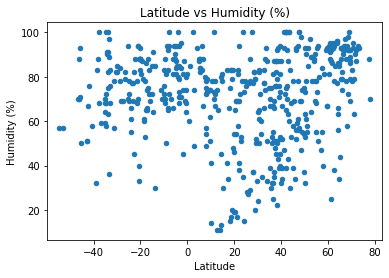

In [234]:
cities_df.plot(x="Lat", y="Humidity",kind="scatter",title="Latitude vs Humidity (%)",xlim=(min_Lat,max_Lat))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

#### Latitude vs. Cloudiness Plot

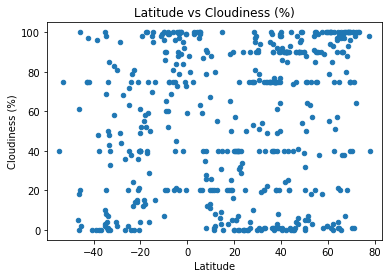

In [235]:
cities_df.plot(x="Lat", y="Cloudiness", kind="scatter",title="Latitude vs Cloudiness (%)",xlim=(min_Lat,max_Lat))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

#### Latitude vs. Wind Speed Plot

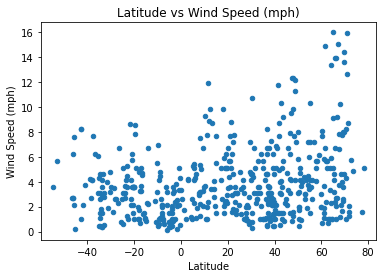

In [236]:
cities_df.plot(x="Lat", y="Wind Speed", kind="scatter",title="Latitude vs Wind Speed (mph)",xlim=(min_Lat,max_Lat))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

In [127]:
# OPTIONAL: Create a function to create Linear Regression plots

In [237]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = cities_df.loc[cities_df["Lat"] > 0.0]
southern_df = cities_df.loc[cities_df["Lat"] < 0.0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The p values is: 0.0
 The equation is: -0.64x + -0.64


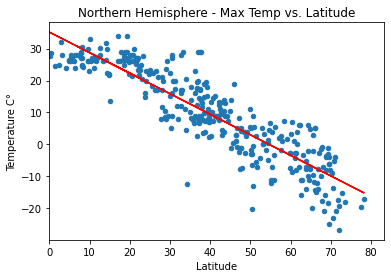

In [248]:
# Linear Regression Model
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
y_lr_values = []

slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The p values is: {round(pvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

northern_df.plot(x = "Lat", y = "Max Temp", kind="scatter",title="Northern Hemisphere - Max Temp vs. Latitude", xlim=(0,max_Lat))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature C°")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The p values is: 0.0
 The equation is: 0.24x + 0.24


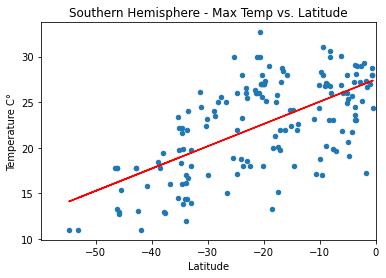

In [249]:
# Linear Regression Model
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
y_lr_values = []

slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The p values is: {round(pvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

southern_df.plot(x = "Lat", y = "Max Temp", kind="scatter",title="Southern Hemisphere - Max Temp vs. Latitude",xlim=(min_Lat,0))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature C°")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The p values is: 0.0
 The equation is: 0.32x + 0.32


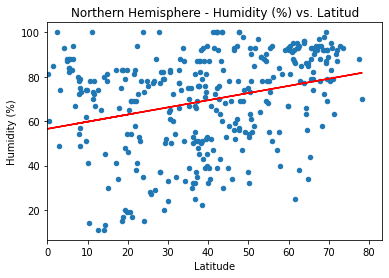

In [250]:
# Linear Regression Model
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
y_lr_values = []

slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The p values is: {round(pvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

northern_df.plot(x = "Lat", y = "Humidity", kind="scatter",title="Northern Hemisphere - Humidity (%) vs. Latitud",xlim=(0,max_Lat))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The p values is: 0.01
 The equation is: 0.22x + 0.22


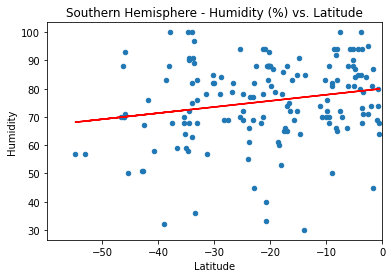

In [252]:
# Linear Regression Model
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
y_lr_values = []

slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The p values is: {round(pvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

southern_df.plot(x = "Lat", y = "Humidity", kind="scatter",title="Southern Hemisphere - Humidity (%) vs. Latitude",xlim=(min_Lat,0))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The p values is: 0.0
 The equation is: 0.47x + 0.47


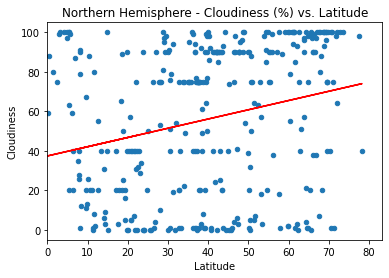

In [251]:
# Linear Regression Model
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
y_lr_values = []

slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The p values is: {round(pvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

northern_df.plot(x = "Lat", y = "Cloudiness", kind="scatter",title="Northern Hemisphere - Cloudiness (%) vs. Latitude",xlim=(0,max_Lat))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The p values is: 0.0
 The equation is: 1.07x + 1.07


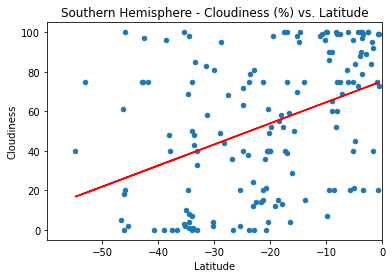

In [253]:
# Linear Regression Model
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
y_lr_values = []

slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The p values is: {round(pvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

southern_df.plot(x = "Lat", y = "Cloudiness", kind="scatter",title="Southern Hemisphere - Cloudiness (%) vs. Latitude",xlim=(min_Lat,0))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The p values is: 0.0
 The equation is: 0.03x + 0.03


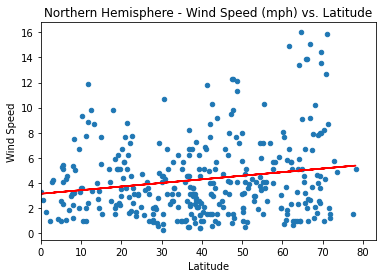

In [254]:
# Linear Regression Model
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
y_lr_values = []

slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The p values is: {round(pvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

northern_df.plot(x = "Lat", y = "Wind Speed", kind="scatter",title="Northern Hemisphere - Wind Speed (mph) vs. Latitude",xlim=(0,max_Lat))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The p values is: 0.0
 The equation is: -0.04x + -0.04


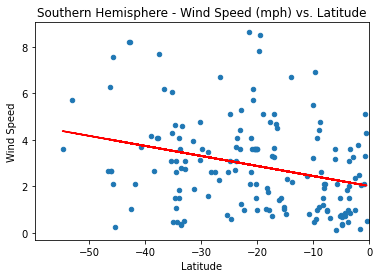

In [255]:
# Linear Regression Model
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
y_lr_values = []

slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The p values is: {round(pvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

southern_df.plot(x = "Lat", y = "Wind Speed", kind="scatter",title="Southern Hemisphere - Wind Speed (mph) vs. Latitude",xlim=(min_Lat,0))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()